# Reviews Analysis

change runtime to GPU

In [1]:
# !nvidia-smi

# 1. Problem Identification & Goal Formulation

+ Problem:
  - In today's market, numerous services and products fall short of meeting user expectations, necessitating a system that can effectively recommend the highest quality options based on insights from user reviews.

+ Goal:
  - The primary objective is to develop a machine learning model that can accurately classify user reviews into two distinct categories: `Positive` and `Negative`. Furthermore, the model should identify and prioritize the `most highly recommended` services and products within the `"Positive" category`, while discouraging the usage of those falling under the `"Negative" category`. This will help users make informed decisions and enhance their overall experience.

# 2. Data Collection

In [2]:
import os
import pandas as pd

In [3]:
# from google.colab import drive
# drive.mount("/content/drive/")

In [4]:
home= os.getcwd()
home

'd:\\Projects\\RA'

load train data

In [5]:
train_data= pd.read_csv(f"{home}/data/train_data/train.csv", names= ['result', 'title', 'reviews']).sample(10000)

In [6]:
train_data.reset_index(drop=True, inplace=True)

In [7]:
train_data.head()

,result,title,reviews
0,2,An Excellent Tune & Near-Perfect Mix,"Fans of Sonique's ""It Feels So Good"" popular t..."
1,2,Simply Beautiful,"This necklace is extraordinarily well made, a ..."
2,2,InSinkErator Evolution Pro Compact Garbage Dis...,This garbage disposer was recommended by my co...
3,1,One year limited use vacuum,This was a good vacuum for the 12 or so times ...
4,1,It rusted withing a few weeks...,At first the shaving kit looked good. There ha...


In [8]:
train_data.tail()

,result,title,reviews
9995,2,It's a decent anime,I'm a huge fan of the art style used in this f...
9996,2,Gene Harris A buried treasure,"My name is Gwendolyn Burnett, I heard Gene Har..."
9997,2,Glad I looked on-line before buying,I almost bought a grill cover when I picked up...
9998,2,I LOVE THIS ALBUM,"I'm a big fan of MT, and to be honest with you..."
9999,1,Will no longer read Blackstock's books.,I've read three of Terri Blackstocks books and...


In [9]:
train_data.shape

(10000, 3)

we have 1 for negative and 2 for positive, so replace 1 with 0 and 2 with 1

In [10]:
train_data['result'] = train_data['result'].replace({1 : 0, 2 : 1}).astype(int)

In [11]:
train_data.sample(5)

,result,title,reviews
137,0,Pointless,I purchased a set of these new and was unable ...
1507,1,A Major Talent!,"Incredible Plot, incredible characters, incred..."
3385,1,"Ready, Set, Relax enriches education...","Ready, Set, Relax provides teachers and parent..."
3109,1,Very good basic phone,I bought this phone because I wanted a dependa...
6141,0,Hmmm....,"As much as I love her, Margaret Cho just wasn'..."


load test data

In [12]:
test_data= pd.read_csv(f"{home}/data/test_data/test.csv", names= ['result', 'title', 'reviews']).sample(2000)

In [13]:
test_data.reset_index(drop=True, inplace=True)

In [14]:
test_data.head()

,result,title,reviews
0,2,nice hamper for the price,I like this hamper because it seems sturdy and...
1,2,A very good nylon case for arts supplies,The soft nylon case is light-weight and appear...
2,2,"""Rae"" of light",Normally i don't listen to this genre of music...
3,1,Not really a Solaris 10 book,The author does not cover the new features of ...
4,2,good product,received as ordered and on time. would order a...


In [15]:
test_data.tail()

,result,title,reviews
1995,2,I LOVED IT!,I love Garth Brooks no matter what he sings! H...
1996,1,Natural Progesterone Cream,"Did not seem to help my menopause symptoms(ie,..."
1997,2,"A ""Classical Gas"" of an album",This is a great album no matter what kind of m...
1998,2,Tielhard De Chardin,This book has been one of the greatest inspira...
1999,1,This is a product from 1987. Do you have a Mac...,I bought this without realizing what I was get...


In [16]:
test_data.shape

(2000, 3)

we have 1 for negative and 2 for positive, so replace 1 with 0 and 2 with 1

In [17]:
test_data['result'] = test_data['result'].replace({1 : 0, 2 : 1}).astype(int)

In [18]:
test_data.sample(5)

,result,title,reviews
470,0,Don't waste your money,This is the second time I've ordered this pump...
483,1,Napoleon and Samantha is a wonderful movie.,I have watched this movie only once in my life...
1215,0,Weak TV cartoons based on Sunday comic strips.,This was Filmation's weak attempt to bring the...
613,1,And the winner is......,If your looking for an affordable boost in hor...
535,1,Gold Standard on Pianos,this supplement is a must for current informat...


unique classes

In [19]:
labels= train_data['result'].unique()
labels

array([1, 0])

# 3. Preprocessing

drop missing values

In [20]:
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)

In [21]:
train_data.isna().sum()

result     0
title      0
reviews    0
dtype: int64

In [22]:
test_data.isna().sum()

result     0
title      0
reviews    0
dtype: int64

drop duplicates

In [23]:
train_data.drop_duplicates(inplace=True)
test_data.drop_duplicates(inplace=True)

we have column `title` not necessary, so we drop it

In [24]:
train_data.drop('title', axis=1, inplace= True)

In [25]:
test_data.drop('title', axis=1, inplace= True)

now, we will start the preprcessing step for NLP

Noise Removal

In [26]:
import nltk
from nltk.corpus import stopwords
# nltk.download('stopwords')

Tokenization

In [27]:
from nltk.tokenize import word_tokenize, sent_tokenize
# nltk.download('punkt')
# nltk.download('wordnet')

Word normalization with `PorterStemmer` and `WordNetLemmatizer`

In [28]:
from nltk.stem import WordNetLemmatizer, PorterStemmer

In [34]:
import contractions
import re

Define funcation preprocessing

In [35]:
def preprocessing(text):
    stop_words = set(stopwords.words('english'))
    excluding = ['againts','no', 'not', 'don', "don't", 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn',
                 "didn't",'doesn', "doesn't", 'hadn', "hadn't", 'has', "hasn't", 'haven', "haven't", 'isn',
                 "isn't", 'might', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shouldn', "shouldn't",
                 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
    stop_words = [word for word in stop_words if word not in excluding]

    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()

    cleaned_texts = []
    sentences = sent_tokenize(text)

    for sent in sentences:
        filtered_sent = []
        tokens = word_tokenize(sent.lower())

        for token in tokens:
            token = re.sub(r'[^a-zA-Z0-9]', '', contractions.fix(token))

            if (token.isalpha()) and (len(token) > 2) and (token not in stop_words):
                token = lemmatizer.lemmatize(stemmer.stem(token))
                filtered_sent.append(token)

        cleaned_sent = " ".join(filtered_sent)
        cleaned_texts.append(cleaned_sent)

    preprocessed_text = " ".join(cleaned_texts)
    return preprocessed_text

In [36]:
test_data.shape

(2000, 2)

In [37]:
test_data['reviews'][2]

'Normally i don\'t listen to this genre of music but I heard her song "Put Your Records On" on a smooth jazz station and was intrigued.The whole CD is like a tall glass of cold water on a sweltering summer\'s day.Very sexy, smooth,and seductive.I love it!'

In [38]:
x = preprocessing(test_data['reviews'][2])
x

'normal listen genr music heard song put record smooth jazz station intriguedth whole like tall glass cold water swelter summer dayveri sexi smooth seductivei love'

In [39]:
X_train= train_data['reviews'].values
y_train= train_data['result'].values.tolist()

In [40]:
X_test= test_data['reviews'].values
y_test= test_data['result'].values.tolist()

# 4. EDA

In [41]:
# plot
ax= sns.countplot(x=train_data['result'],
                  data=train_data)

for p in ax.patches: # bars
    '''
    get_bbox(): return bounding box of the bar, 
    get_points(): returns the coordinates of the four corners of the bounding box.
    '''
    x= p.get_bbox().get_points()[:,0] # extract the x-coordinates of the four corners of the bar rectangle
    y= p.get_bbox().get_points()[1,1] # extract the y-coordinate of the top-right corner
    ax.annotate(f'{y:.0f}', (x.mean(), y), ha='center',va='bottom') # text on top bar
    
plt.title("Reviews are balance")
plt.show()

NameError: name 'sns' is not defined

# 5. Model Selection

In [125]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
# from sklearn.naive_bayes import MultinomialNB

Define the pipeline

In [136]:
pipeline= Pipeline([
    ('tfidf', TfidfVectorizer(use_idf=True,
                              preprocessor= preprocessing, 
                              tokenizer=word_tokenize,
                              max_features=5000,
                              max_df= 0.5,
                              min_df= 3,
                              ngram_range=(1, 3)
                            #   analyzer='char'
                              )
     ),
    ('nb', LogisticRegression(max_iter=100))
])

Define a grid of hyperparameters for the MultinomialNB model


In [107]:
# param_grid_lr= {
    # 'tfidf__ngram_range': [(1, 1), (1, 2), (2, 2), (1,3)],
    # 'tfidf__max_df': [0.5, 0.75, 1.0],
    # 'tfidf__min_df': [1, 2, 3],
    # 'tfidf__max_features': [1000, 5000, 10000, 20000],
    # 'tfidf__analyzer': ['word', 'char', 'char_wb'],
    # 'lr__C': [0.1, 1, 10]
# }

Create GridSearchCV instance

In [94]:
# grid_search= GridSearchCV(pipeline,
#                           param_grid= param_grid_lr,
#                           cv= 5,
#                           return_train_score= True)

# 6. Model Training

In [95]:
type(y_train)

list

In [96]:
type(X_train)

numpy.ndarray

Fit the GridSearchCV on your training data

In [137]:
pipeline.fit(X_train, y_train)

c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.5, max_features=5000, min_df=3,
                                 ngram_range=(1, 3),
                                 preprocessor=<function preprocessing at 0x00000289962F53A0>,
                                 tokenizer=<function word_tokenize at 0x0000028A1B1F2FC0>)),
                ('nb', LogisticRegression())])

params for number of iteration

In [98]:
# pd.DataFrame(grid_search.cv_results_)[['params']]

Best parameters

In [99]:
# grid_search.best_params_

Best score

In [100]:
# f"{round(pipeline.best_score_*100)}%"

 Get the best estimator

In [101]:
# best_pipline= grid_search.best_estimator_

# 7. Model Evaluation

In [53]:
from sklearn.metrics import accuracy_score, confusion_matrix

 Now you can use the best_pipeline for prediction

In [138]:
y_pred= pipeline.predict(X_test)

accuracy_score

In [139]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {round(accuracy*100)}%")

Accuracy: 83%


confusion_matrix

In [140]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[802, 166],
       [172, 860]], dtype=int64)

# 8. Visualization

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns

Heatmap

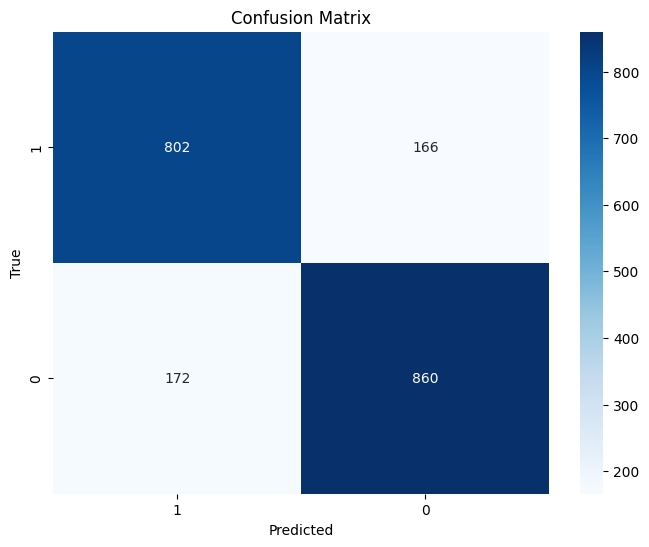

In [142]:
plt.figure(figsize = (8,6))
sns.heatmap(cm,
            xticklabels=labels,
            yticklabels=labels,
            annot=True,
            cmap='Blues',
            fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 9. Save Model

In [143]:
import joblib
model_path = f'{home}/models/pp_tfidf_lr_no_hp_83.joblib'
joblib.dump(pipeline, model_path)

['d:\\Projects\\RA/models/pp_tfidf_lr_no_hp_83.joblib']

In [144]:
model= joblib.load(model_path)

In [156]:
model.predict(["hello it's great service, thank you"]) # 

array([1])

In [158]:
model.predict(["hello it's bad service, i'm sad"]) # 

array([0])